In [1]:
import tensorflow as tf

print(tf.__version__)

2.5.0


In [ ]:
!pip install -U --pre tensorflow=="1.15.*"

     |████████████████████████████████| 110.5MB 73kB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 2.9MB 35.8MB/s 
     |████████████████████████████████| 512kB 39.1MB/s 
     |████████████████████████████████| 3.8MB 35.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=1325b1f9dcafa7918171c44d99d265e52af1b552817f40f1e58d7b0387874921
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0

In [ ]:
%%bash
cd /content/drive/MyDrive/foreign_kindergarten/models/research/slim
pip install .
cd /content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/packages/tf1
pip install .

Processing /content/drive/MyDrive/foreign_kindergarten/models/research/slim
  Created wheel for slim: filename=slim-0.1-cp37-none-any.whl size=231251 sha256=8ffdba88a4a1c10db7b34b9290a5833c49ed443d8b9c0ed74b410d60c8ea0ca0
  Stored in directory: /tmp/pip-ephem-wheel-cache-zc24mix5/wheels/09/1a/a1/cdd3c49b9edeb25cdd969f05a234c57e22315fbdf4290cf08b
Successfully built slim
Processing /content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/packages/tf1
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1169 sha256=2f17ecb1279e853e85d5dc5609b96e0ae6cbd744281d5e72f22d9b064fbc12f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-8nh809a8/wheels/12/13/87/67a212c9bdf3574576c8dbd6abcd09ea8a254b08f438ab0d63
Successfully built object-detection


In [ ]:
%set_env PYTHONPATH=/content/drive/MyDrive/foreign_kindergarten/models/research:/content/drive/MyDrive/foreign_kindergarten/models/research/slim
import os
os.chdir('/content/drive/MyDrive/foreign_kindergarten/models/research/object_detection')

env: PYTHONPATH=/content/drive/MyDrive/foreign_kindergarten/models/research:/content/drive/MyDrive/foreign_kindergarten/models/research/slim


In [ ]:
!python /content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/export_inference_graph.py \
  --input_type image_tensor \
  --pipeline_config_path /content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/training/rfcn_resnet101_coco.config\
  --trained_checkpoint_prefix=/content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/training/model.ckpt-3026\
  --output_directory /content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/training

INFO:tensorflow:Scale of 0 disables regularizer.
I0604 01:27:21.090503 140719666513792 regularizers.py:99] Scale of 0 disables regularizer.
Instructions for updating:
Please use `layer.__call__` method instead.
W0604 01:27:21.093137 140719666513792 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0604 01:27:24.246343 140719666513792 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0604 01:27:24.399615 140719666513792 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0604 01:27:24.400112 140719666513792 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
I

video_detect.ipynb 파일 복사해온 것

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
import time
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

from google.colab.patches import cv2_imshow

In [ ]:
# Name of the directory containing the object detection module we're using
MODEL_NAME = 'rfcn_resnet101_coco'
VIDEO_NAME = '외국 어린이집.mp4'
# Grab path to current working directory
CWD_PATH = os.getcwd()
# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = '/content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/training/frozen_inference_graph.pb'
# Path to label map file
PATH_TO_LABELS = '/content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/training/labelmap.pbtxt'
# Path to video
PATH_TO_VIDEO = '/content/drive/MyDrive/foreign_kindergarten/' + VIDEO_NAME
# Number of classes the object detector can identify
NUM_CLASSES = 2
# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [ ]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.compat.v1.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
    sess = tf.compat.v1.Session(graph=detection_graph)

In [ ]:
# Define input and output tensors (i.e. data) for the object detection classifier
# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')
# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)
prevTime = 0 #이전 시간을 저장할 변수

In [ ]:
width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

fps = video.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

new_file_name = '/content/drive/MyDrive/foreign_kindergarten/models/research/object_detection/training/detection_foreign_kindergarten.mp4'

#save_video = cv2.VideoWriter(new_file_name, fourcc, fps, (int(width), int(height)))

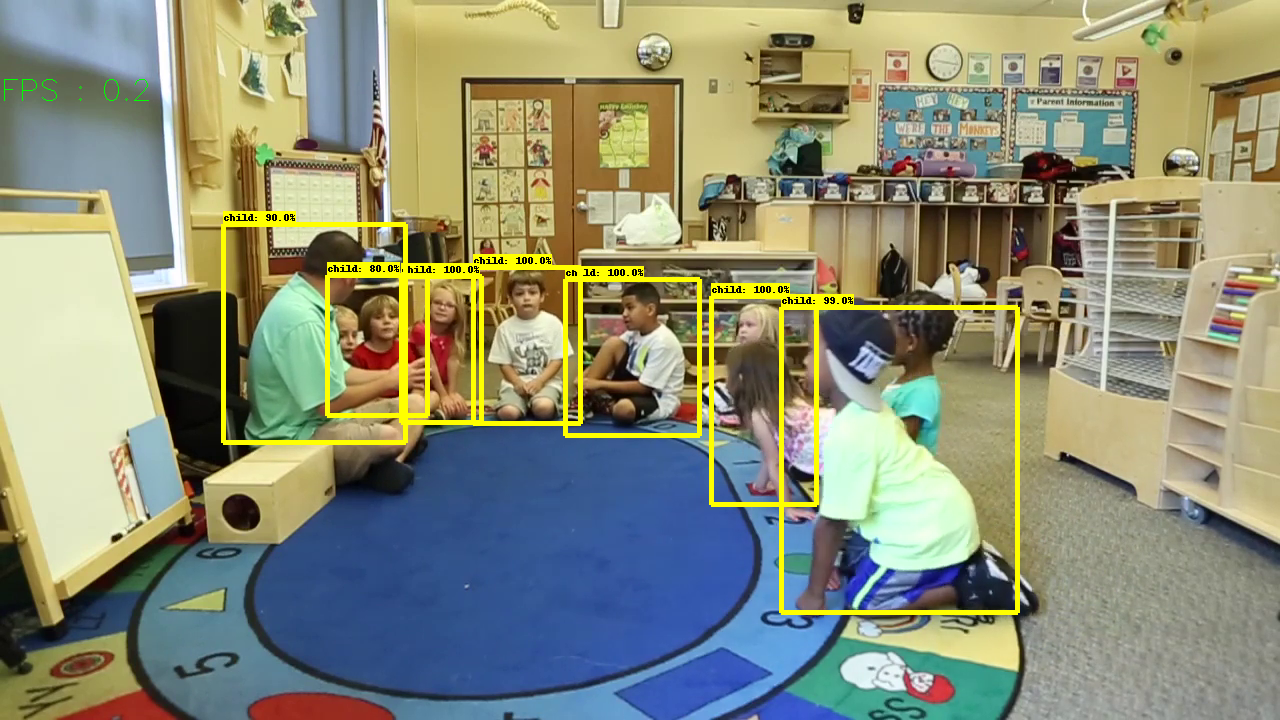

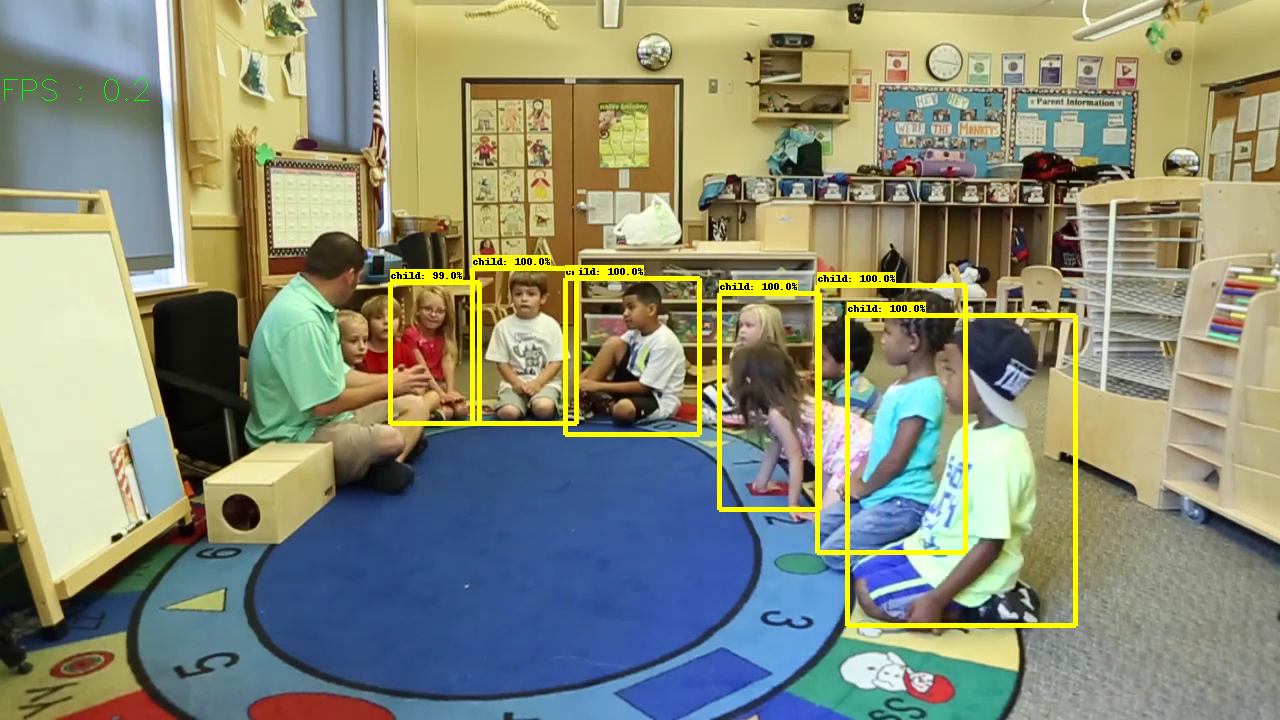

KeyboardInterrupt: ignored

In [ ]:
count = 0

while(video.isOpened()):
    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    count += 1

    if count % 10 == 0:
      frame_expanded = np.expand_dims(frame, axis=0)
      # Perform the actual detection by running the model with the image as input
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: frame_expanded})
      
      # bounding box 좌표 찾기
      bounding_box_edges = []
      box = np.squeeze(boxes)
      score = np.squeeze(scores)
      num_of_boxes = 48
      for i in range(len(box)):
        if box[i][0] == 0:
          break
        if score[i] > 0.8:
          num_of_boxes += 1
          bounding_box_edges.append([num_of_boxes, box[i][1] * width, box[i][0] * height, box[i][3] * width, box[i][2] * height])
      
      # Draw the results of the detection (aka 'visulaize the results')
      vis_util.visualize_boxes_and_labels_on_image_array(
          frame,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=5,
          min_score_thresh=0.80)
      
      bounding_box_edges = sorted(bounding_box_edges, key=lambda bb: -((bb[3]-bb[1])*(bb[4]-bb[2])))
      '''
      numbering = 48
      for bb in bounding_box_edges:
        # bounding box 꼭짓점 그리기
        frame = cv2.rectangle(frame, (int(bb[1]) - 5, int(bb[2]) - 5), (int(bb[1]) + 5, int(bb[2]) + 5), (0, 0, 0), -5)
        frame = cv2.rectangle(frame, (int(bb[1]) - 5, int(bb[4]) - 5), (int(bb[1]) + 5, int(bb[4]) + 5), (0, 0, 0), -5)
        frame = cv2.rectangle(frame, (int(bb[3]) - 5, int(bb[2]) - 5), (int(bb[3]) + 5, int(bb[2]) + 5), (0, 0, 0), -5)
        frame = cv2.rectangle(frame, (int(bb[3]) - 5, int(bb[4]) - 5), (int(bb[3]) + 5, int(bb[4]) + 5), (0, 0, 0), -5) 
        # bounding box 식별 번호 쓰기 좌상단에 쓰겠음
        numbering += 1
        cv2.putText(frame, chr(numbering), (int((bb[1]+bb[3])/2 - (bb[3]-bb[1])/6)  , int((bb[2]+bb[4])/2  + (bb[4]-bb[2])/8)) , cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 5)
      '''
    curTime = time.time()
    # 한번 돌아온 시간!!
    sec = curTime - prevTime
    # 이전 시간을 현재시간으로 다시 저장시킴
    prevTime = curTime
    # 프레임 계산 한바퀴 돌아온 시간을 1초로 나누면 된다.
    # 1 / time per frame
    fps = 1 / (sec)
    # 디버그 메시지로 확인해보기
    #print ("Time {0} ".format(sec))
    #print ("Estimated fps {0} ".format(fps))
    # 프레임 수를 문자열에 저장
    str = "FPS : %0.1f" % fps
    if count % 20 == 0:
      # 표시
      cv2.putText(frame, str, (0, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0))
      # All the results have been drawn on the frame, so it's time to display it.
      small_frame = cv2.resize(frame, dsize=(360, 240), interpolation=cv2.INTER_AREA)
      cv2_imshow(frame)
    #save_video.write(frame)
    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break
    

In [ ]:
# Clean up
video.release()
#save_video.release()
cv2.destroyAllWindows()